In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Big Mart Sales Prediction Dataset.csv")

Missing Value Analysis:
             Missing Values  Missing Percentage
Item_Weight            1463           17.165317
Outlet_Size            2410           28.276428

Remaining Missing Values After Imputation:
Empty DataFrame
Columns: [Missing Values, Missing Percentage]
Index: []


C:\Users\raksh\AppData\Local\Temp\ipykernel_23060\297800100.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['Item_Weight'].fillna(item_weight_median, inplace=True)
C:\Users\raksh\AppData\Local\Temp\ipykernel_23060\297800100.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

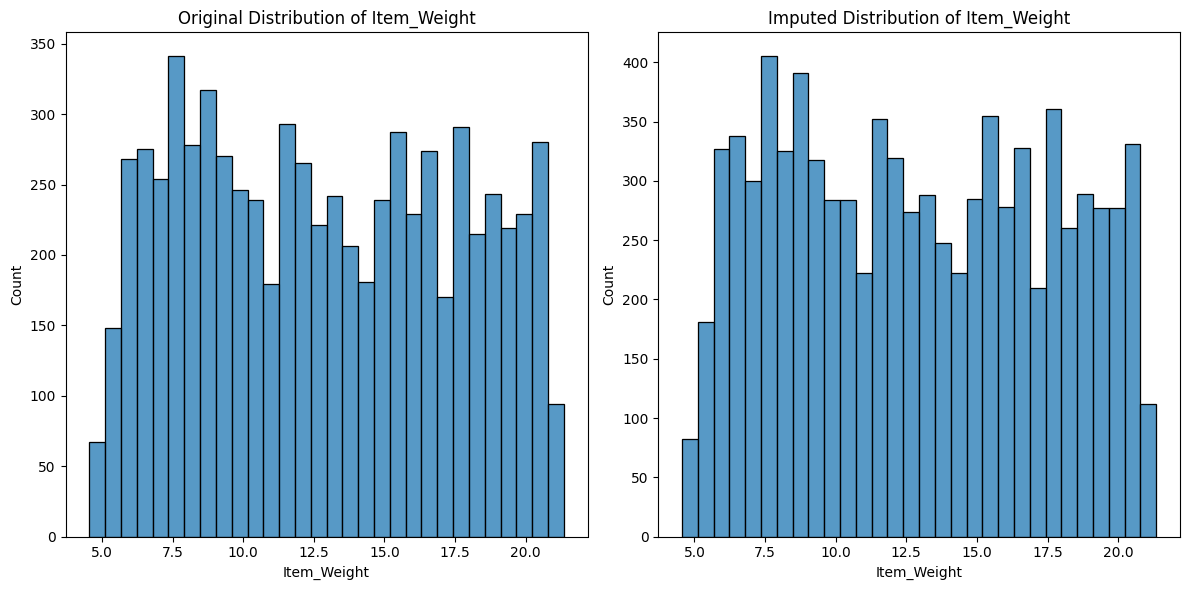

In [2]:
def analyze_missing_values(df):
    """
    Analyze missing values in the dataset and return detailed statistics
    """
    # Get missing value counts and percentages
    missing_values = df.isnull().sum()
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    
    # Create a summary DataFrame
    missing_info = pd.DataFrame({
        'Missing Values': missing_values,
        'Missing Percentage': missing_percentages
    })
    
    # Only show columns with missing values
    return missing_info[missing_info['Missing Values'] > 0]

# Display missing value analysis
print("Missing Value Analysis:")
print(missing_values_info := analyze_missing_values(df))

# Analyze the distribution of non-missing values for numerical columns
def analyze_distributions(df, columns_with_missing):
    """
    Create visualizations for numerical columns with missing values
    """
    numerical_columns = df[columns_with_missing.index].select_dtypes(include=['float64', 'int64']).columns
    
    for col in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col].dropna(), bins=30)
        plt.title(f'Distribution of {col}')
        plt.show()
        
        print(f"\nStatistics for {col}:")
        print(df[col].describe())

# Impute missing values based on data characteristics
def impute_missing_values(df):
    """
    Impute missing values using appropriate methods for each column
    """
    df_imputed = df.copy()
    
    # Item_Weight: Use median imputation as it's a numerical column and is less sensitive to outliers
    if 'Item_Weight' in df.columns and df['Item_Weight'].isnull().sum() > 0:
        # Group by Item_Identifier to get more accurate imputations
        item_weight_median = df.groupby('Item_Identifier')['Item_Weight'].transform('median')
        df_imputed['Item_Weight'].fillna(item_weight_median, inplace=True)
        # For any remaining missing values, use overall median
        df_imputed['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)
    
    # Outlet_Size: Use mode imputation as it's a categorical column
    if 'Outlet_Size' in df.columns and df['Outlet_Size'].isnull().sum() > 0:
        # Group by Outlet_Type to get more accurate imputations
        outlet_size_mode = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode()[0])
        df_imputed['Outlet_Size'].fillna(outlet_size_mode, inplace=True)
        # For any remaining missing values, use overall mode
        df_imputed['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)
    
    return df_imputed

# Perform imputation
df_imputed = impute_missing_values(df)

# Verify no missing values remain
print("\nRemaining Missing Values After Imputation:")
print(analyze_missing_values(df_imputed))

# Compare original and imputed distributions for numerical columns
def compare_distributions(df_original, df_imputed, columns_with_missing):
    """
    Compare distributions before and after imputation
    """
    numerical_columns = df_original[columns_with_missing.index].select_dtypes(include=['float64', 'int64']).columns
    
    for col in numerical_columns:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        sns.histplot(df_original[col].dropna(), bins=30)
        plt.title(f'Original Distribution of {col}')
        
        plt.subplot(1, 2, 2)
        sns.histplot(df_imputed[col], bins=30)
        plt.title(f'Imputed Distribution of {col}')
        
        plt.tight_layout()
        plt.show()

# Compare distributions
compare_distributions(df, df_imputed, missing_values_info)

Correlation Matrix:
                           Item_Identifier  Item_Weight  Item_Fat_Content  \
Item_Identifier                   1.000000     0.048833         -0.098114   
Item_Weight                       0.048833     1.000000         -0.018929   
Item_Fat_Content                 -0.098114    -0.018929          1.000000   
Item_Visibility                  -0.025482    -0.014048          0.034042   
Item_Type                        -0.017973     0.030765         -0.115958   
Item_MRP                          0.012853     0.027141         -0.000876   
Outlet_Identifier                -0.008602    -0.007995         -0.002357   
Outlet_Establishment_Year        -0.012772    -0.011588         -0.000189   
Outlet_Size                       0.000855    -0.015656         -0.004795   
Outlet_Location_Type              0.003656     0.004715         -0.004102   
Outlet_Type                      -0.001178    -0.001088         -0.004214   
Item_Outlet_Sales                 0.002869     0.014123 

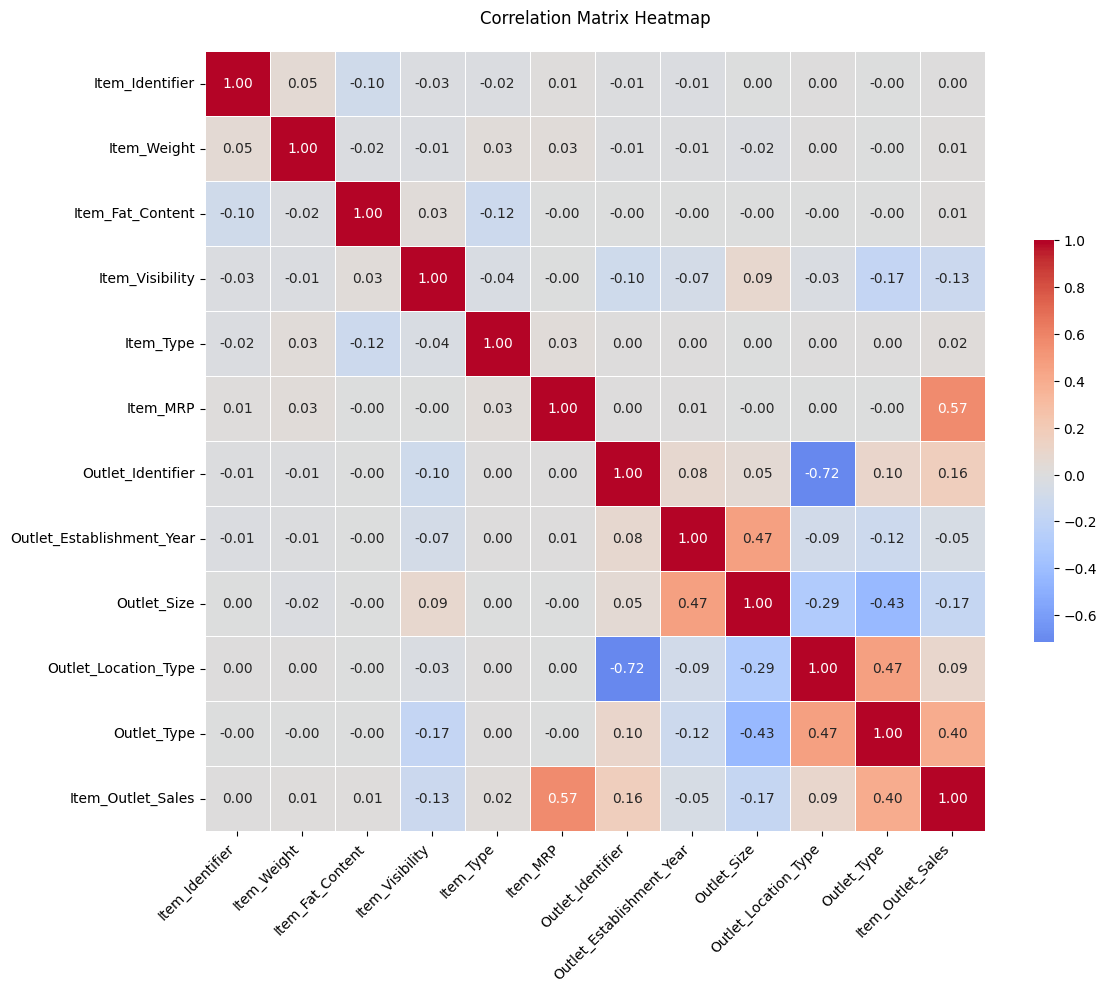

In [3]:
df_numeric = df.copy()

# Convert categorical columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for column in categorical_columns:
    df_numeric[column] = le.fit_transform(df[column].astype(str))

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Round to 2 decimal places
            square=True,  # Make cells square
            linewidths=0.5,  # Add lines between cells
            cbar_kws={"shrink": .5})  # Adjust colorbar size

plt.title('Correlation Matrix Heatmap', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

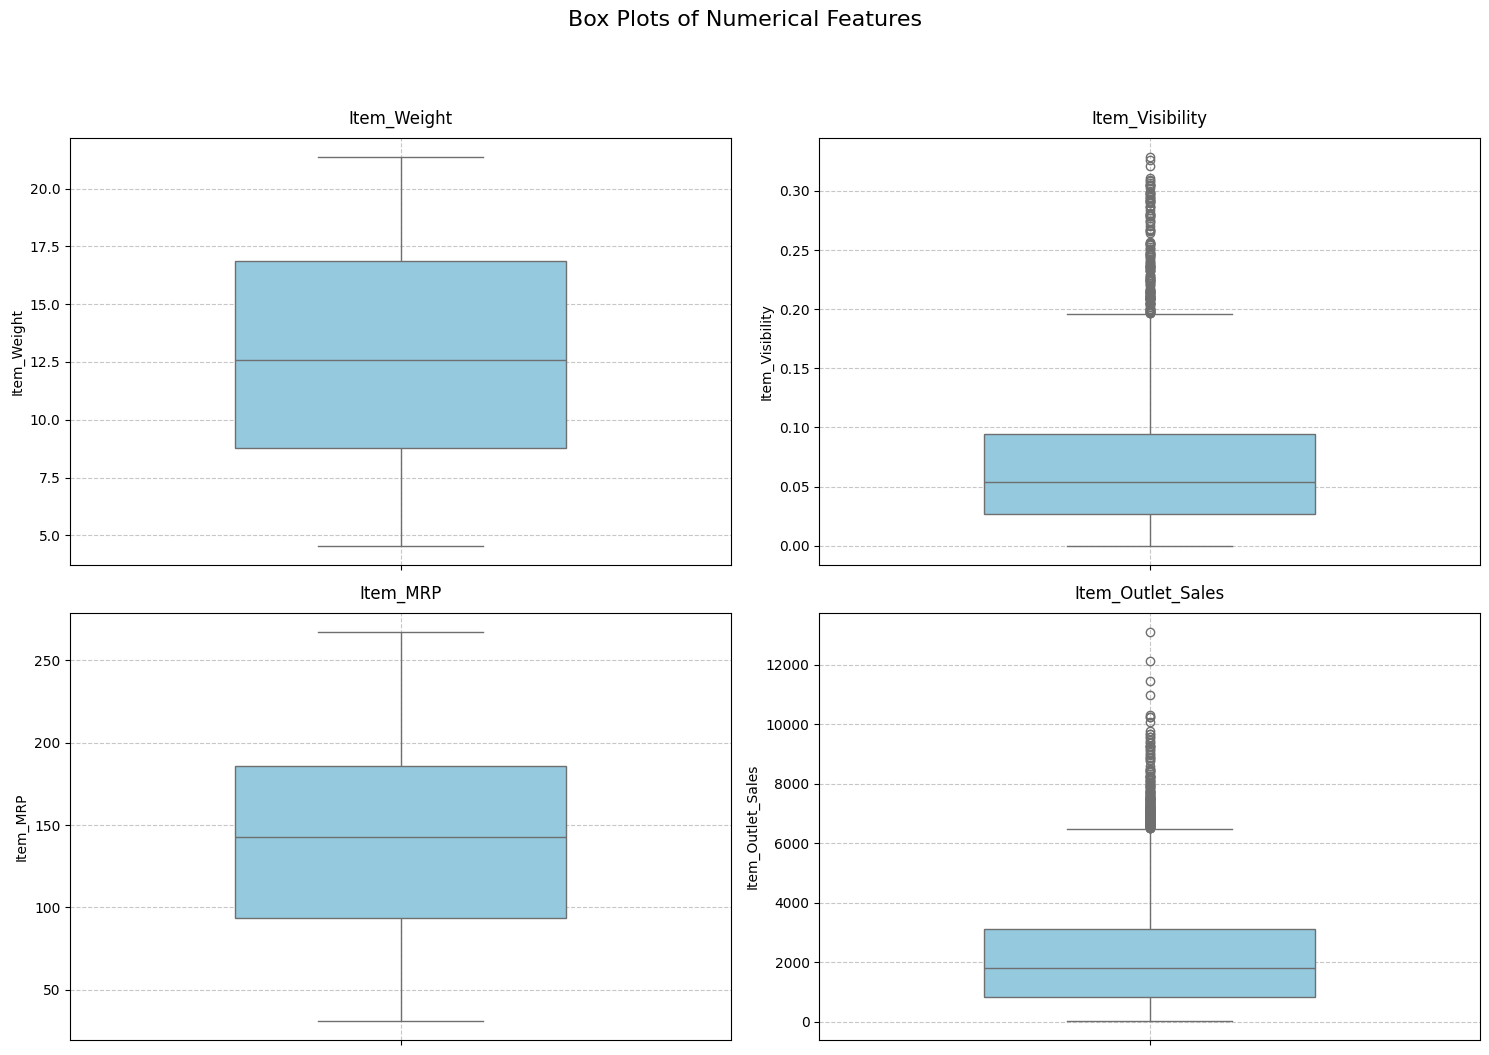

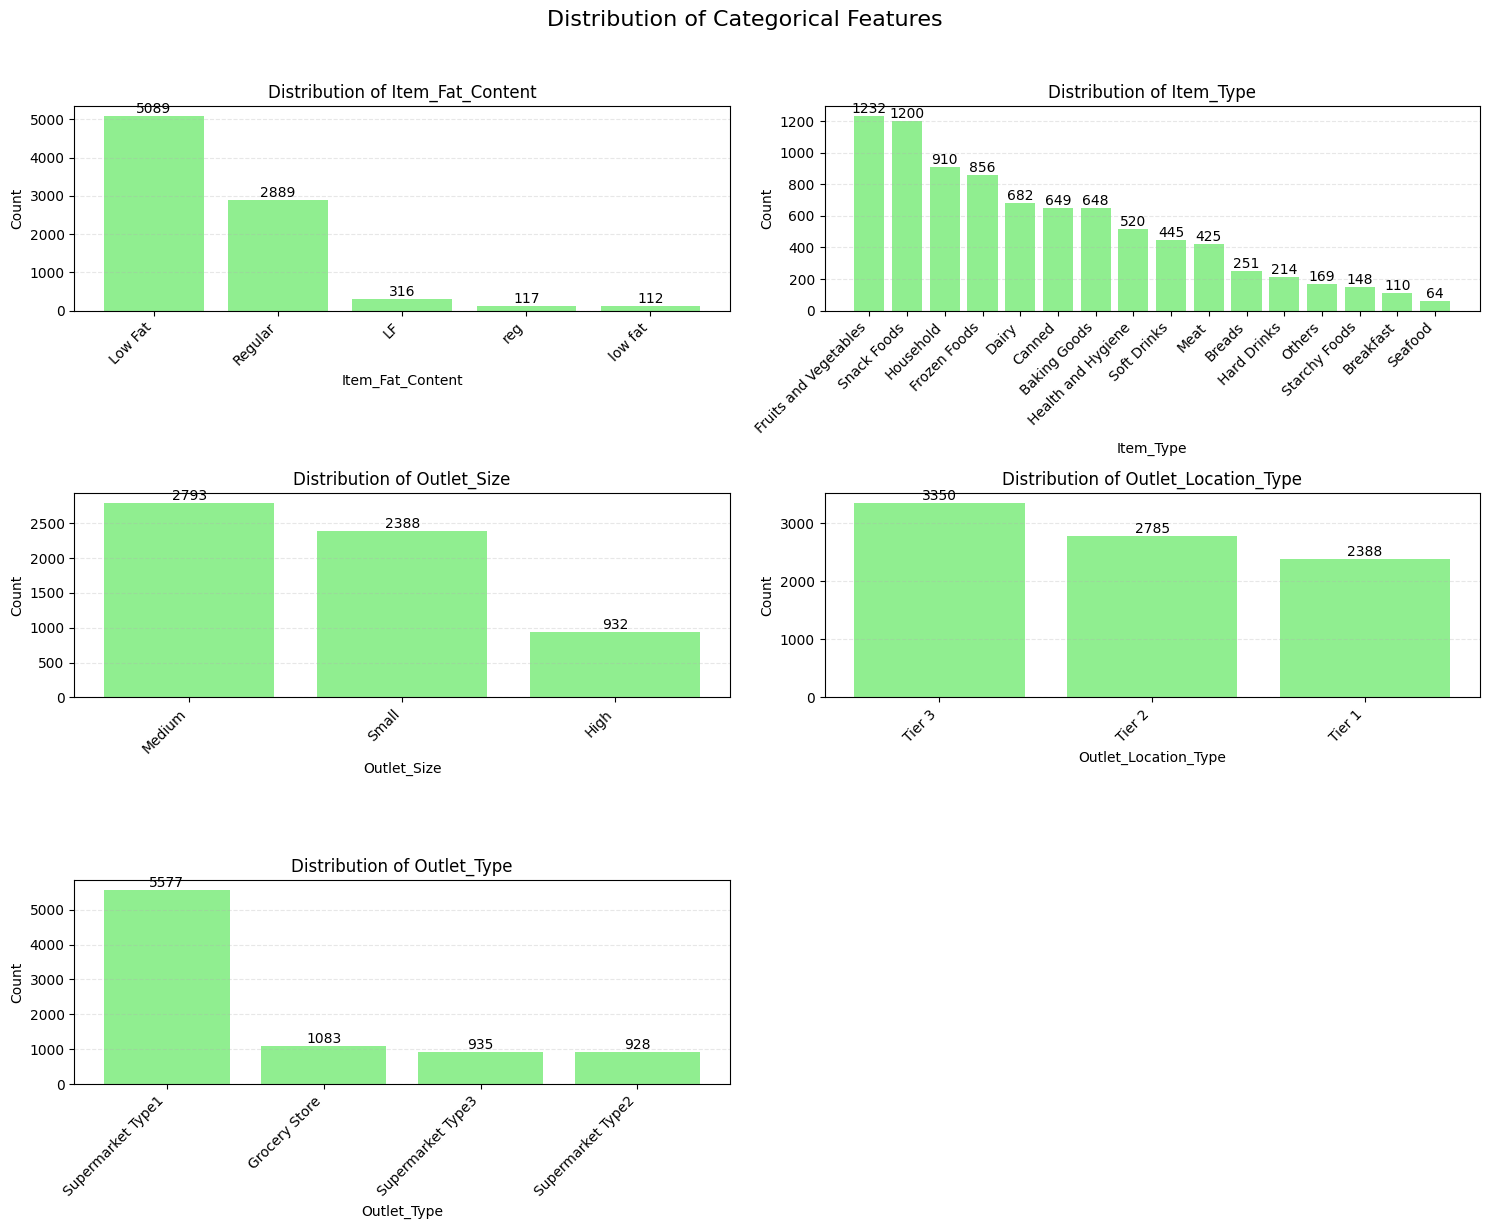


Summary Statistics for Numerical Features:
       Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
count      7060.00          8523.00   8523.00            8523.00
mean         12.86             0.07    140.99            2181.29
std           4.64             0.05     62.28            1706.50
min           4.56             0.00     31.29              33.29
25%           8.77             0.03     93.83             834.25
50%          12.60             0.05    143.01            1794.33
75%          16.85             0.09    185.64            3101.30
max          21.35             0.33    266.89           13086.96

Distribution of Categorical Features:

Item_Fat_Content:
                  Count  Percentage
Item_Fat_Content                   
Low Fat            5089        59.7
Regular            2889        33.9
LF                  316         3.7
reg                 117         1.4
low fat             112         1.3
--------------------------------------------------

Item_Type

In [4]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# 1. Box Plots for Numerical Features
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Box Plots of Numerical Features', fontsize=16, y=1.05)

for idx, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, idx)
    # Add color and customization to box plot
    sns.boxplot(data=df, y=feature, color='skyblue', width=0.5)
    plt.title(feature, pad=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    
plt.tight_layout()
plt.show()

# 2. Bar Plots for Categorical Features
n_cats = len(categorical_features)
fig = plt.figure(figsize=(15, 4*((n_cats+1)//2)))
fig.suptitle('Distribution of Categorical Features', fontsize=16, y=1.02)

for idx, feature in enumerate(categorical_features, 1):
    plt.subplot((n_cats+1)//2, 2, idx)
    
    # Calculate value counts
    value_counts = df[feature].value_counts()
    
    # Create bar plot
    bars = plt.bar(range(len(value_counts)), value_counts.values, color='lightgreen')
    
    # Customize the plot
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    
    # Set x-axis labels
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(df[numerical_features].describe().round(2))

# Print value counts and percentages for categorical features
print("\nDistribution of Categorical Features:")
for feature in categorical_features:
    print(f"\n{feature}:")
    counts = df[feature].value_counts()
    percentages = df[feature].value_counts(normalize=True).round(3) * 100
    
    # Combine counts and percentages
    distribution = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    })
    print(distribution)
    print("-" * 50)